# Solutions for 2D solute transport in uniform background flow
This notebook shows some examples of two-dimensional solute transport in uniform background flow. The examples are based on [Wexler (1992)](https://doi.org/10.3133/twri03B7), as is the underlying code.



## Infinite aquifer with a continuous point source

In [1]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

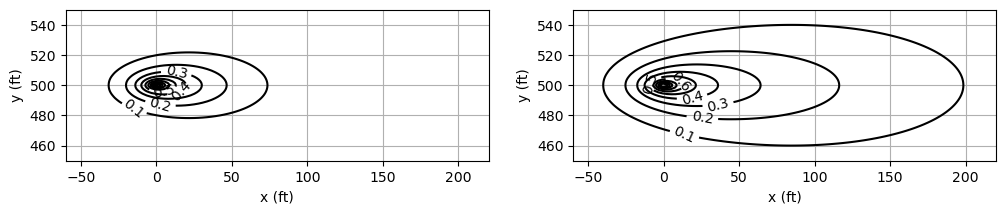

In [2]:
from adepy.uniform import point2

Q = 1250
B = 100

v = 2
al = 30
ah = 6
c0 = 1000
xc = 0
yc = 500
n = 0.25

Qa = Q / B

x, y = np.meshgrid(np.linspace(-60, 220, 100), np.linspace(450, 550, 100))
t = [25, 100]

c = []
fig, ax = plt.subplots(1, len(t), figsize=(12, 4))

for i, ti in enumerate(t):
    c.append(point2(c0, x, y, ti, v, n, al, ah, Qa, xc, yc))
    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()

## Bounded aquifer with a strip source

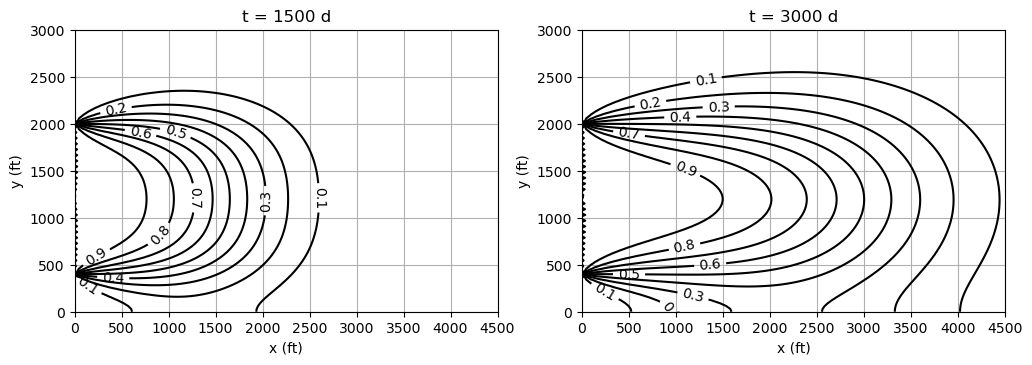

In [3]:
from adepy.uniform import stripf

w = 3000
y1 = 400
y2 = 2000
v = 1
al = 200
ah = 60
c0 = 1000


x, y = np.meshgrid(np.linspace(0, 4500, 100), np.linspace(0, 3000, 100))
t = [1500, 3000]

c = []
fig, ax = plt.subplots(1, len(t), figsize=(12, 4))

for i, ti in enumerate(t):
    c.append(stripf(c0, x, y, ti, v, al, ah, y1, y2, w))

    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"t = {ti} d")

## Semi-infinite aquifer with a strip source

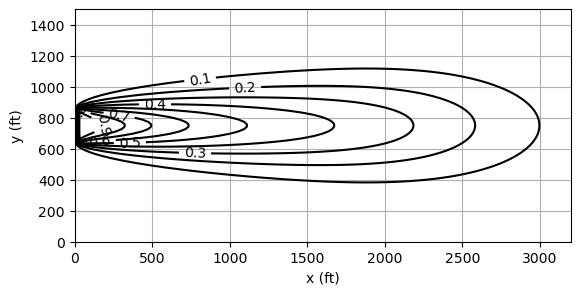

In [4]:
from adepy.uniform import stripi

y1 = 635
y2 = 865
v = 1.42
al = 70
ah = 14
c0 = 40

x, y = np.meshgrid(np.linspace(0, 3200, 100), np.linspace(0, 1500, 100))
t = 5 * 365

c = stripi(c0, x, y, t, v, al, ah, y1, y2)

cs = plt.contour(x, y, c / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
plt.clabel(cs, fmt="%.1f")
plt.gca().set_aspect(1.0)
plt.xlabel("x (ft)")
plt.ylabel("y (ft)")
plt.grid()

## Semi-infinite aquifer with a Gaussian strip source

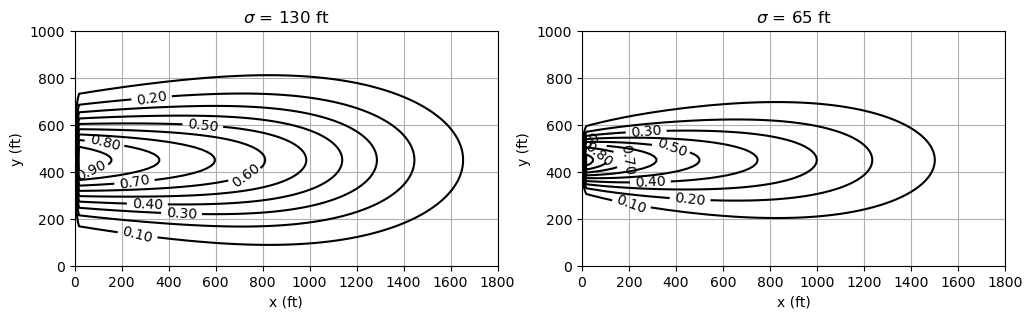

In [5]:
from adepy.uniform import gauss

c0 = 1000
sigma = [130, 65]
yc = 450
v = 4
Dx = 150
Dy = 30

x, y = np.meshgrid(np.linspace(0, 1800, 100), np.linspace(0, 1000, 100))
t = 300

c = []
fig, ax = plt.subplots(1, len(sigma), figsize=(12, 6))

for i, s in enumerate(sigma):
    c.append(gauss(c0, x, y, t, v, al, ah, yc, s))

    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.2f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"$\\sigma$ = {s:.0f} ft")